In [16]:
from scipy import stats
from xgrads import *
import numpy as np  # 调用numpy
import xarray as xr
from math import *
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [17]:
def createmap():
    ###############################################生成地图##########################################################
    box = [-180, 180, -90, 90]  # 经度维度
    scale = '110m'  # 地图分辨率
    xstep = 20  # 下面标注经纬度的步长
    ystep = 10
    proj = ccrs.PlateCarree(central_longitude=180)  # 确定地图投影
    fig = plt.figure(figsize=(9, 6))  # dpi=150)###生成底图
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  # 确定子图，与grads的类似
    ##海岸线
    ax.coastlines(scale)
    # 标注坐标轴
    ax.set_xticks(np.arange(box[0], box[1] + xstep, xstep), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2], box[3] + ystep, ystep), crs=ccrs.PlateCarree())
    # 经纬度格式，把0经度设置不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ############################################################################################################
    return ax, fig

In [18]:
air = xr.open_dataset('D:\\grads\\TongJi\\NCEP_TPSST_30y_Wt.nc')
# hgt = xr.open_dataset('D:\\grads\\TongJi\\NCEP_slp_30y_Wt.nc')
hgt =xr.open_dataset(r'D:\grads\TongJi\NCEP_Z200_30y_Wt.nc')

In [19]:
lon = air['lon'][:]
lat = air['lat'][:]
st1 = air['st'][4, :, :]
st2 = air['st'][8, :, :]
st3 = air['st'][13, :, :]
st4 = air['st'][19, :, :]
st5 = air['st'][24, :, :]

for i in range(len(lon)):
    for j in range(len(lat)):
        if float(st1[j, i]) > 9999:
            st1[j, i] = np.NAN
        if float(st2[j, i]) > 9999:
            st2[j, i] = np.NAN
        if float(st3[j, i]) > 9999:
            st3[j, i] = np.NAN
        if float(st4[j, i]) > 9999:
            st4[j, i] = np.NAN
        if float(st5[j, i]) > 9999:
            st5[j, i] = np.NAN

avest1 = np.nanmean(st1)
avest2 = np.nanmean(st2)
avest3 = np.nanmean(st3)
avest4 = np.nanmean(st4)
avest5 = np.nanmean(st5)

In [20]:
lon1 = hgt['lon'][:]
lat1 = hgt['lat'][:]
hgt1 = hgt['hgt'][4, :, :]
hgt2 = hgt['hgt'][8, :, :]
hgt3 = hgt['hgt'][13, :, :]
hgt4 = hgt['hgt'][19, :, :]
hgt5 = hgt['hgt'][24, :, :]
avehgt = (hgt1 + hgt2 + hgt3 + hgt4 + hgt5) / 5
avest = (avest1 + avest2 + avest3 + avest4 + avest5) / 5

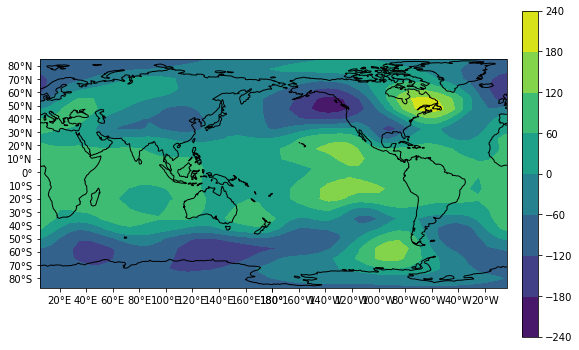

In [21]:
b = np.zeros((len(lat1), len(lon1)))
for i in range(len(lon1)):
    for j in range(len(lat1)):
        b[j, i] = (avest1 * hgt1[j, i] + avest2 * hgt2[j, i] + avest3 * hgt3[j, i] + avest4 * hgt4[j, i] + avest5 *
                   hgt5[j, i] - 5 * avest * avehgt[j, i]) / (
                          pow(avest1, 2) + pow(avest2, 2) + pow(avest3, 2) + pow(avest4, 2) + pow(avest5, 2) - 5 * pow(
                      avest, 2))
ax, fig = createmap()
a=ax.contourf(lon1, lat1, b, transform=ccrs.PlateCarree())
plt.colorbar(a, extendrect='True', pad=0.03, fraction=0.04, shrink=1)
plt.show()